<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Resub-DS-assignments-1-3/blob/main/Random%20forest(Fraudcheck).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
path = r"/content/Fraud_check.csv"

In [3]:
data = pd.read_csv(path)

In [4]:
data['IncomeCategory'] = np.where(data['Taxable.Income'] <= 30000, 'Risky', 'Good')

In [5]:
data.drop('Taxable.Income', axis=1, inplace=True)

In [13]:
data['IncomeCategory'] = data['IncomeCategory'].map({'Risky': 0, 'Good': 1})

In [14]:
print(data.head())

  Undergrad Marital.Status  City.Population  Work.Experience Urban  \
0        NO         Single            50047               10   YES   
1       YES       Divorced           134075               18   YES   
2        NO        Married           160205               30   YES   
3       YES         Single           193264               15   YES   
4        NO        Married            27533               28    NO   

   IncomeCategory  
0               1  
1               1  
2               1  
3               1  
4               1  


In [15]:
print(data.shape)

(600, 6)


In [16]:
print(data.dtypes)

Undergrad          object
Marital.Status     object
City.Population     int64
Work.Experience     int64
Urban              object
IncomeCategory      int64
dtype: object


In [17]:
print(data.isnull().sum())

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
IncomeCategory     0
dtype: int64


In [18]:
print(data['IncomeCategory'].value_counts())

1    476
0    124
Name: IncomeCategory, dtype: int64


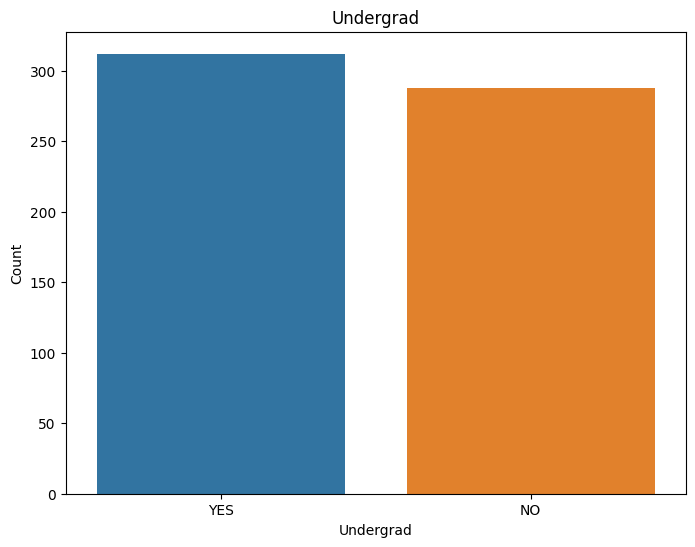

In [23]:
plt.figure(figsize=(8, 6))
undergrad_counts = data['Undergrad'].value_counts()
sns.barplot(x=undergrad_counts.index, y=undergrad_counts)
plt.title('Undergrad')
plt.xlabel('Undergrad')
plt.ylabel('Count')
plt.show()

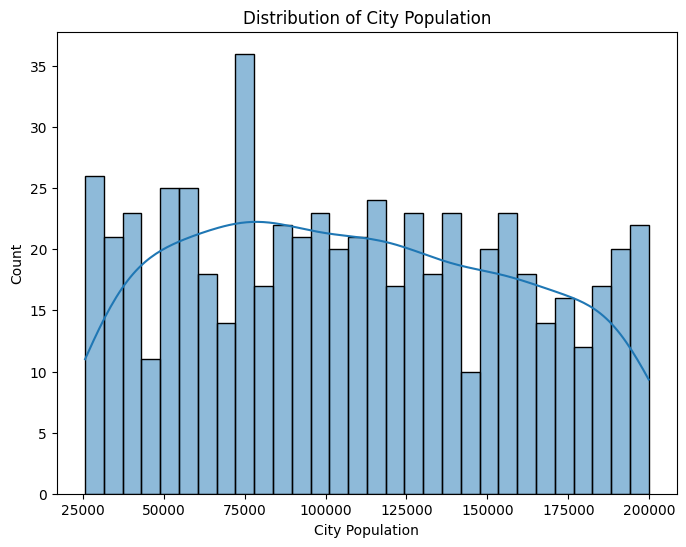

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(data['City.Population'], bins=30, kde=True)
plt.title('Distribution of City Population')
plt.xlabel('City Population')
plt.ylabel('Count')
plt.show()

In [26]:
data_encoded = pd.get_dummies(data, drop_first=True)

In [27]:
X = data_encoded.drop('IncomeCategory', axis=1)
y = data_encoded['IncomeCategory']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [30]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = rf_classifier.predict(X_test)

In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 26]
 [ 8 86]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.77      0.91      0.83        94

    accuracy                           0.72       120
   macro avg       0.38      0.46      0.42       120
weighted avg       0.60      0.72      0.65       120



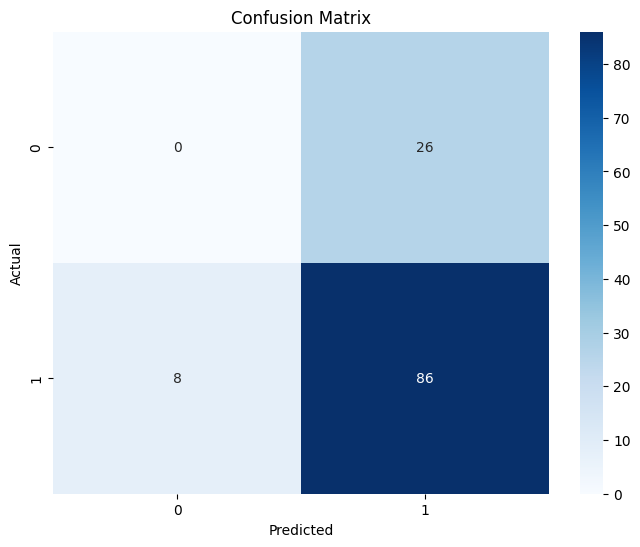

In [33]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

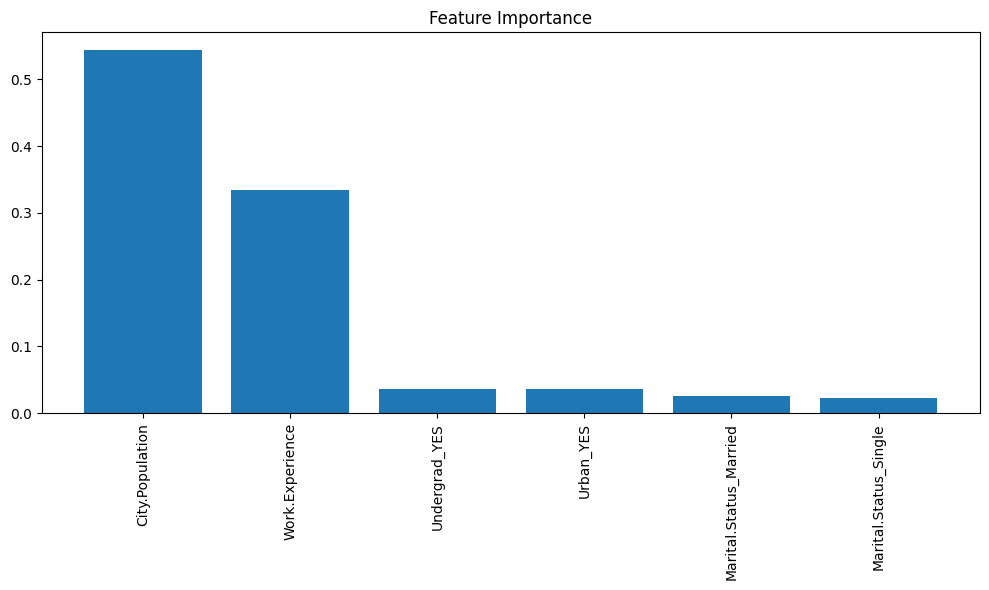

In [34]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()